In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("./salaryData.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [4]:
dataset.shape

(30, 2)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
print(dataset.min())
print(dataset.max())
print(dataset.describe())

YearsExperience        1.1
Salary             37731.0
dtype: float64
YearsExperience        10.5
Salary             122391.0
dtype: float64
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


df.corr()

It gives the relation between the different independent variales and using this we can eliminate the features which have very little effect on the dependent variable

In [7]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<h1>Visualization Using Scatter Plot</h1>

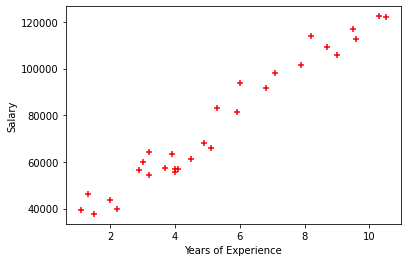

In [8]:
x = dataset.iloc[:, :-1].values   #this will pick all columns except for the last column
y = dataset.iloc[:, -1].values   #this is picking the last column as that is going to be our label always

plt.scatter(x, y, color='r', marker = '+')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Splitting of dataset in test and train data

In [9]:
import sklearn

from sklearn.model_selection import train_test_split

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 1/3, random_state = 1)
#random_state = constant value will pick always the same data, so our accuracy will be same for each run
#otherwise according to different data, the accuracy will keep on changing



# Creating the model

In [11]:


from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(xtrain, ytrain)

LinearRegression()

# Prediction

In [12]:
y_pred = model.predict(xtest)
print(y_pred)

[ 74675.37776747  91160.02832519  61853.98288925  81086.07520659
  67348.86640849  88412.58656557 113139.56240215  44453.51841166
 105813.05104316  98486.53968418]


In [13]:
model.predict([[9]])  

array([108560.49280278])

In [14]:
model.coef_

array([9158.13919873])

In [15]:
model.intercept_

26137.24001419694

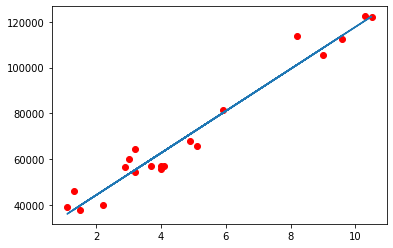

In [16]:
plt.scatter(xtrain, ytrain, color='r')
plt.plot(xtrain, model.predict(xtrain))
plt.show()

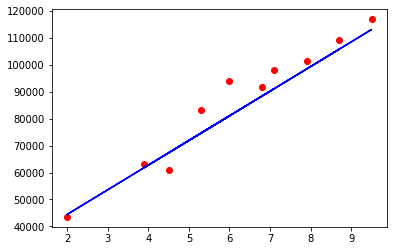

In [17]:
plt.scatter(xtest, ytest, color = 'r')
plt.plot(xtest, y_pred, color = 'b')
plt.show()

# Saving a model

## using pickle library

In [18]:
import pickle

In [19]:
with open('pickle_model', 'wb') as file:
    pickle.dump(model, file)

## load model

In [20]:
with open('pickle_model', 'rb') as file:
    md = pickle.load(file)

In [21]:
md.predict([[4]])

array([62769.79680912])

## using joblib library

In [24]:
import joblib

joblib.dump(model, 'joblib_model')

['joblib_model']

In [25]:
mdjoblib = joblib.load('joblib_model')
mdjoblib.predict([[4]])

array([62769.79680912])